## Basic Overview
1. Shape of the datasets

2. Column names and types

3. Null/missing values

4. Data dictionary (explanation of what each column means)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#reading all the preparaped dataset
df_2001_processed= pd.read_csv('/content/drive/MyDrive/Datasets/Processed/NCRB_2001_Processed.csv')
df_2002_processed= pd.read_csv('/content/drive/MyDrive/Datasets/Processed/NCRB_2002_Processed.csv')
df_2003_processed= pd.read_csv('/content/drive/MyDrive/Datasets/Processed/NCRB_2003_Processed.csv')
df_2004_processed= pd.read_csv('/content/drive/MyDrive/Datasets/Processed/NCRB_2004_Processed.csv')
df_2006_processed= pd.read_csv('/content/drive/MyDrive/Datasets/Processed/NCRB_2006_Processed.csv')
df_2007_processed= pd.read_csv('/content/drive/MyDrive/Datasets/Processed/NCRB_2007_Processed.csv')
df_2008_processed= pd.read_csv('/content/drive/MyDrive/Datasets/Processed/NCRB_2008_Processed.csv')
df_2009_processed= pd.read_csv('/content/drive/MyDrive/Datasets/Processed/NCRB_2009_Processed.csv')
df_2010_processed= pd.read_csv('/content/drive/MyDrive/Datasets/Processed/NCRB_2010_Processed.csv')
df_2011_processed= pd.read_csv('/content/drive/MyDrive/Datasets/Processed/NCRB_2011_Processed.csv')
df_2013_processed= pd.read_csv('/content/drive/MyDrive/Datasets/Processed/NCRB_2013_Processed.csv')
df_2015_processed= pd.read_csv('/content/drive/MyDrive/Datasets/Processed/NCRB_2015_Processed.csv')
df_2018_processed= pd.read_csv('/content/drive/MyDrive/Datasets/Processed/NCRB_2018_Processed.csv')
df_2019_processed= pd.read_csv('/content/drive/MyDrive/Datasets/Processed/NCRB_2019_Processed.csv')
df_2020_processed= pd.read_csv('/content/drive/MyDrive/Datasets/Processed/NCRB_2020_Processed.csv')
df_2021_processed= pd.read_csv('/content/drive/MyDrive/Datasets/Processed/NCRB_2021_Processed.csv')
df_2022_processed= pd.read_csv('/content/drive/MyDrive/Datasets/Processed/NCRB_2022_Processed.csv')

#making datafram with column name of shape,null/missinng values,Data dictionary
def create_data_profile_dataframe(df, year):
    profile_data = {
        'Year': [year],
        'Shape': [df.shape],
        'Null/Missing Values': [df.isnull().sum().sum()],  # Total null values
    }


    return pd.DataFrame(profile_data)

dataframes = {
    2001: df_2001_processed,
    2002: df_2002_processed,
    2003: df_2003_processed,
    2004: df_2004_processed,
    2006: df_2006_processed,
    2007: df_2007_processed,
    2008: df_2008_processed,
    2009: df_2009_processed,
    2010: df_2010_processed,
    2011: df_2011_processed,
    2013: df_2013_processed,
    2015: df_2015_processed,
    2018: df_2018_processed,
    2019: df_2019_processed,
    2020: df_2020_processed,
    2021: df_2021_processed,
    2022: df_2022_processed,
}


profile_dfs = []
for year, df in dataframes.items():
    profile_dfs.append(create_data_profile_dataframe(df, year))

final_profile_df = pd.concat(profile_dfs, ignore_index=True)
final_profile_df

,Year,Shape,Null/Missing Values
0,2001,"(74, 14)",18
1,2002,"(74, 14)",0
2,2003,"(74, 14)",0
3,2004,"(74, 22)",0
4,2006,"(74, 27)",0
5,2007,"(74, 14)",0
6,2008,"(74, 14)",0
7,2009,"(74, 14)",0
8,2010,"(74, 14)",0
9,2011,"(92, 14)",0


In [ ]:
def create_column_profile_dataframe(df, year):
    column_data = {
        'Year': [year] * len(df.columns),
        'Column Name': df.columns,
        'Column Type': df.dtypes.values,
    }
    return pd.DataFrame(column_data)

column_profile_dfs = []
for year, df in dataframes.items():
    column_profile_dfs.append(create_column_profile_dataframe(df, year))

final_column_profile_df = pd.concat(column_profile_dfs, ignore_index=True)

# Remove duplicate columns based on 'Year' and 'Column Name'
final_column_profile_df = final_column_profile_df.drop_duplicates(subset=['Year', 'Column Name'])
final_column_profile_df


,Year,Column Name,Column Type
0,2001,Category,object
1,2001,States/UTs/Cities,object
2,2001,No. of Victims (Incest Rape Cases) upto 10 Years,float64
3,2001,No. of Victims (Incest Rape Cases) <18 Years,float64
4,2001,No. of Victims (Incest Rape Cases) > 18 Years,float64
...,...,...,...
197,2022,2022 - Rape (Cases Registered) - Girls (Below ...,int64
198,2022,2022 - Rape (Cases Registered) - Women (Above ...,int64
199,2022,2022 - Rape (Cases Registered) - Total,int64
200,2022,2022 - CCS,int64


## Yearly Trend Analysis

1. Total victims per year (stacked bar: <18, >18)

2. Breakdown: Incest vs. Other Rape vs. Total Rape cases

3. Year-wise growth rate (percentage change)

### Yearly trend of Incest rape case in India from 2001 to 2013


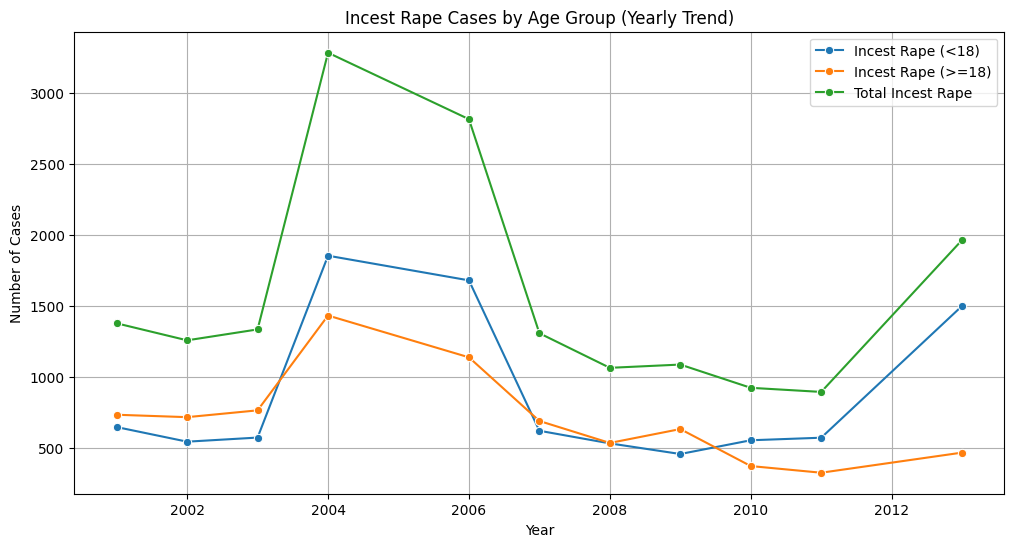

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a list to store data for plotting
incest_data = []

for year, df in dataframes.items():
  if 'No. of Victims (Incest Rape Cases) <18 Years' in df.columns and 'No. of Victims (Incest Rape Cases) > 18 Years' in df.columns and 'No. of Victims (Incest Rape Cases) upto 10 Years' in df.columns:
      incest_data.append({
          'Year': year,
          'Incest_Rape_under_10': df['No. of Victims (Incest Rape Cases) upto 10 Years'].sum(),
          'Incest_Rape_under_18': df['No. of Victims (Incest Rape Cases) <18 Years'].sum(),
          'Incest_Rape_Over_18': df['No. of Victims (Incest Rape Cases) > 18 Years'].sum(),
          'Incest_Rape_Under_18': df['No. of Victims (Incest Rape Cases) <18 Years'].sum() + df['No. of Victims (Incest Rape Cases) upto 10 Years'].sum(),
          'Incest_Rape_total': df['No. of Victims (Incest Rape Cases) <18 Years'].sum() + df['No. of Victims (Incest Rape Cases) > 18 Years'].sum() + df['No. of Victims (Incest Rape Cases) upto 10 Years'].sum()
      })
  else:
      print(f"Warning: Columns 'No. of Victims (Incest Rape Cases) <18 Years' or 'No. of Victims (Incest Rape Cases) > 18 Years' not found for year {year}. Skipping.")

incest_df = pd.DataFrame(incest_data)


plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Incest_Rape_Under_18', data=incest_df, label='Incest Rape (<18)', marker='o')
sns.lineplot(x='Year', y='Incest_Rape_Over_18', data=incest_df, label='Incest Rape (>=18)', marker='o')
sns.lineplot(x='Year', y='Incest_Rape_total', data=incest_df, label='Total Incest Rape', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.title('Incest Rape Cases by Age Group (Yearly Trend)')
plt.legend()
plt.grid(True)



### Yearly trend of rape cases other than Incest  in India from 2001 to 2013

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px

# Create a list to store data for plotting
Other_data = []

for year, df in dataframes.items():
    # Check if columns exist using .get() with a default value of 0
    #Also using try-except block to handle KeyError if a column is not found
    try:
        Other_Rape_under_10 = df['No. of Victims (Other Rape Cases) upto 10 Years'].sum()
        Other_Rape_under_18 = df['No. of Victims (Other Rape Cases) < 18 Years'].sum()
        Other_Rape_Over_18 = df['No. of Victims (Other Rape Cases) > 18 Years'].sum()
        Other_Rape_Under_18 = Other_Rape_under_10 + Other_Rape_under_18
        Other_Rape_total = Other_Rape_Over_18+ Other_Rape_Under_18
        Other_data.append({
            'Year': year,
            'Other_Rape_Under_18': Other_Rape_Under_18,
            'Other_Rape_Over_18': Other_Rape_Over_18,
            'Other_Rape_total':Other_Rape_total #Adding Other_Rape_total to the list
        })
    except KeyError as e:
        print(f"Warning: Column '{e}' not found for year {year}. Skipping.")

Other_df = pd.DataFrame(Other_data)

fig = px.line(Other_df,
              x='Year',
              y=['Other_Rape_Under_18', 'Other_Rape_Over_18', 'Other_Rape_total'],
              title='Rape Cases other than incest by Age Group (Yearly Trend)',
              labels={'value': 'Number of Cases', 'variable': 'Age Group'},
              markers=True)

fig.update_layout(legend_title='Age Group',
                  xaxis_title='Year',
                  yaxis_title='Number of Cases',
                  grid=dict(rows=1, columns=1, pattern='independent'),  # Enable grid lines
                  )

fig.show()

### Yearly trend of total rape cases in India from 2001 to 2013

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a list to store data for plotting
Total_data = []

for year, df in dataframes.items():
    # Check if columns exist using .get() with a default value of 0
    #Also using try-except block to handle KeyError if a column is not found
    try:
        Total_Rape_Under_18 = df['No. of Victims (Total Rape Cases) < 18 Years'].sum()
        Total_Rape_Over_18 = df['No. of Victims (Total Rape Cases) > 18 Years'].sum()
        Total_Rape_total = Total_Rape_Over_18+ Total_Rape_Under_18
        Total_data.append({
            'Year': year,
            'Total_Rape_Under_18': Total_Rape_Under_18,
            'Total_Rape_Over_18': Total_Rape_Over_18,
            'Total_Rape_total':Total_Rape_total
        })
    except KeyError as e:
        print(f"Warning: Column '{e}' not found for year {year}. Skipping.")

Total_data = pd.DataFrame(Total_data)  # DataFrame is named Total_data

import plotly.express as px

fig = px.line(Total_data,
              x='Year',
              y=['Total_Rape_Under_18', 'Total_Rape_Over_18', 'Total_Rape_total'],
              title='Total Rape Cases by Age Group (Yearly Trend)',
              labels={'value': 'Number of Cases', 'variable': 'Age Group'},
              markers=True)

fig.update_layout(legend_title='Age Group',
                  xaxis_title='Year',
                  yaxis_title='Number of Cases',
                  grid=dict(rows=1, columns=1, pattern='independent'))

# Add text annotation
fig.add_annotation(
    text="Data is not available for 2005, 2012, 2014,2015, 2016,2017",
    xref="paper",  # Position relative to the chart (paper)
    yref="paper",
    x=0.05,  # Adjust x position as needed
    y=0.95,  # Adjust y position as needed
    showarrow=False,  # Hide arrow
    font=dict(size=12)  # Adjust font size as needed
)

fig.show()


## Geospatial Visualization
* Using choropleth maps to visualize state-wise intensity

### Statewise intensity of Rape Cases in India in 2022

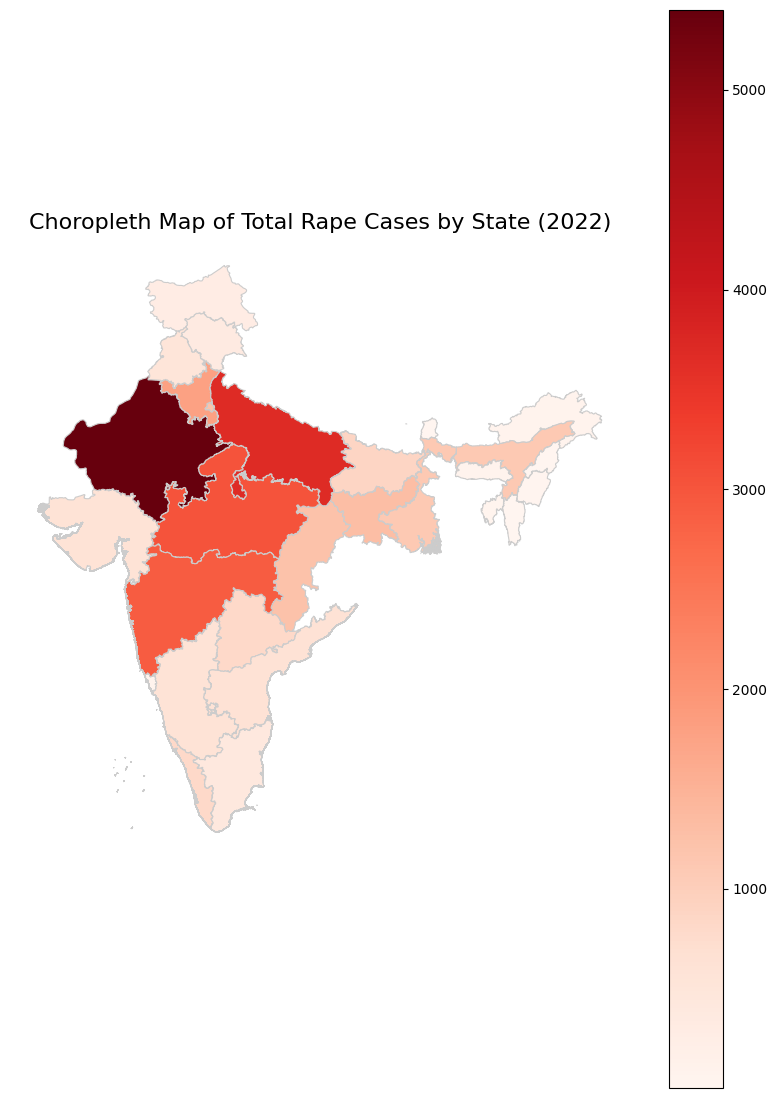

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load India states shapefile (GeoJSON)
india_states_url = 'https://raw.githubusercontent.com/geohacker/india/master/state/india_telengana.geojson'
india_gdf = gpd.read_file(india_states_url)

# Rename column for merging
india_gdf = india_gdf.rename(columns={'NAME_1': 'State'})

# If there are known state name mismatches, map them
state_name_mapping = {
    'Orissa': 'Odisha',
    'Uttaranchal': 'Uttarakhand',
    # Add more mappings if needed
}
df_2022_processed['Mapped_State'] = df_2022_processed['State/UT'].replace(state_name_mapping)

# Merge your data with the geodataframe
merged_gdf = india_gdf.merge(
    df_2022_processed,
    left_on='State',
    right_on='Mapped_State',
    how='left'
)

# Plot choropleth
fig, ax = plt.subplots(1, 1, figsize=(10, 14))
merged_gdf.plot(
    column='No. of Victims (Total Rape Cases) - Total Victims',
    cmap='Reds',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True
)
ax.set_title('Choropleth Map of Total Rape Cases by State (2022)', fontsize=16)
ax.axis('off')
plt.show()


### Statewise intensity of Rape Cases in India in 2021

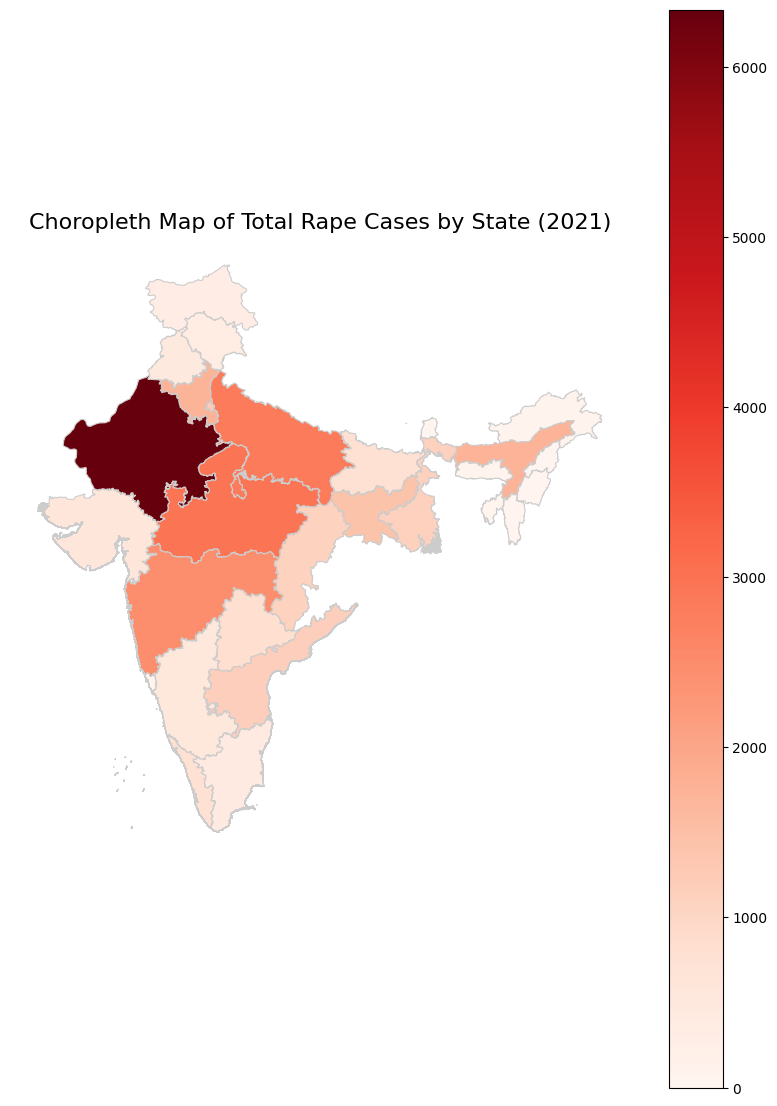

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load India states shapefile (GeoJSON)
india_states_url = 'https://raw.githubusercontent.com/geohacker/india/master/state/india_telengana.geojson'
india_gdf = gpd.read_file(india_states_url)

# Rename column for merging
india_gdf = india_gdf.rename(columns={'NAME_1': 'State'})

# If there are known state name mismatches, map them
state_name_mapping = {
    'Orissa': 'Odisha',
    'Uttaranchal': 'Uttarakhand',
    # Add more mappings if needed
}
df_2021_processed['Mapped_State'] = df_2021_processed['State/UT'].replace(state_name_mapping)

# Merge your data with the geodataframe
merged_gdf = india_gdf.merge(
    df_2021_processed,
    left_on='State',
    right_on='Mapped_State',
    how='left'
)

# Plot choropleth
fig, ax = plt.subplots(1, 1, figsize=(10, 14))
merged_gdf.plot(
    column='No. of Victims (Total Rape Cases) - Total Victims',
    cmap='Reds',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True
)
ax.set_title('Choropleth Map of Total Rape Cases by State (2021)', fontsize=16)
ax.axis('off')
plt.show()


### Statewise intensity of Rape Cases in India in 2020

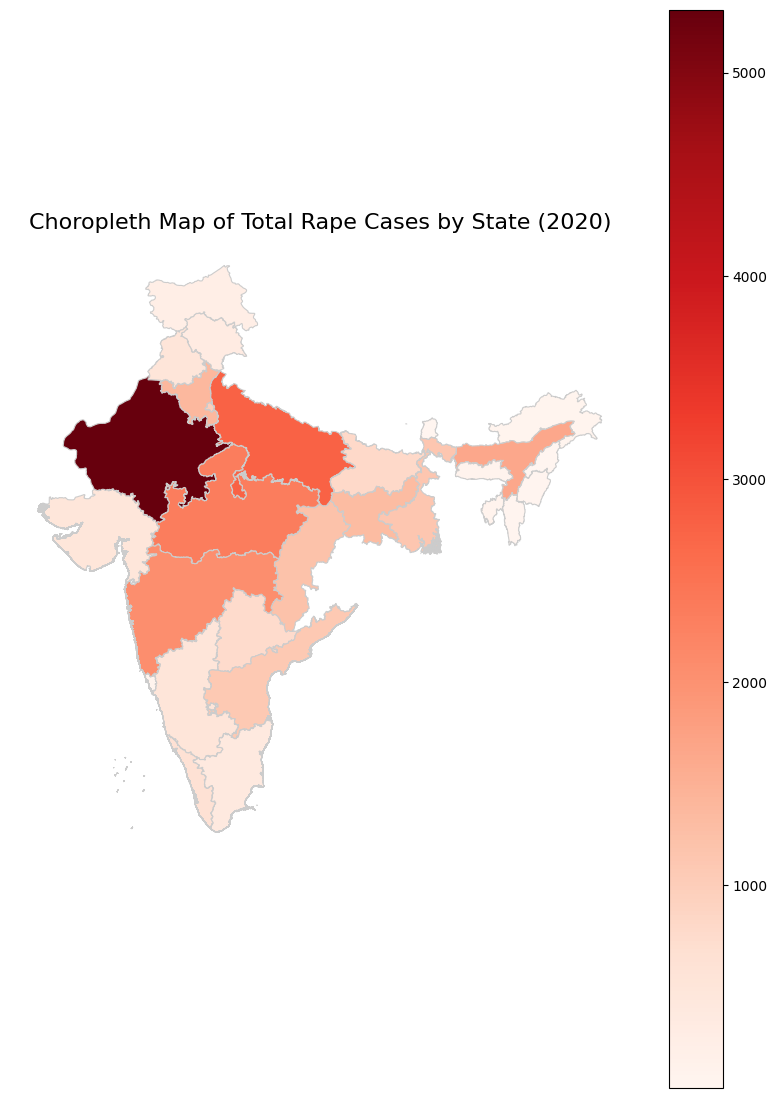

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


# Load India states shapefile (GeoJSON)
india_states_url = 'https://raw.githubusercontent.com/geohacker/india/master/state/india_telengana.geojson'
india_gdf = gpd.read_file(india_states_url)

# Rename column for merging
india_gdf = india_gdf.rename(columns={'NAME_1': 'State'})

# If there are known state name mismatches, map them
state_name_mapping = {
    'Orissa': 'Odisha',
    'Uttaranchal': 'Uttarakhand',
    # Add more mappings if needed
}
df_2020_processed['Mapped_State'] = df_2020_processed['State/UT'].replace(state_name_mapping)

# Merge your data with the geodataframe
merged_gdf = india_gdf.merge(
    df_2020_processed,
    left_on='State',
    right_on='Mapped_State',
    how='left'
)

# Plot choropleth
fig, ax = plt.subplots(1, 1, figsize=(10, 14))
merged_gdf.plot(
    column='No. of Victims (Total Rape Cases) - Total Victims',
    cmap='Reds',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True
)
ax.set_title('Choropleth Map of Total Rape Cases by State (2020)', fontsize=16)
ax.axis('off')
plt.show()


### Statewise intensity of Rape Cases in India in 2019

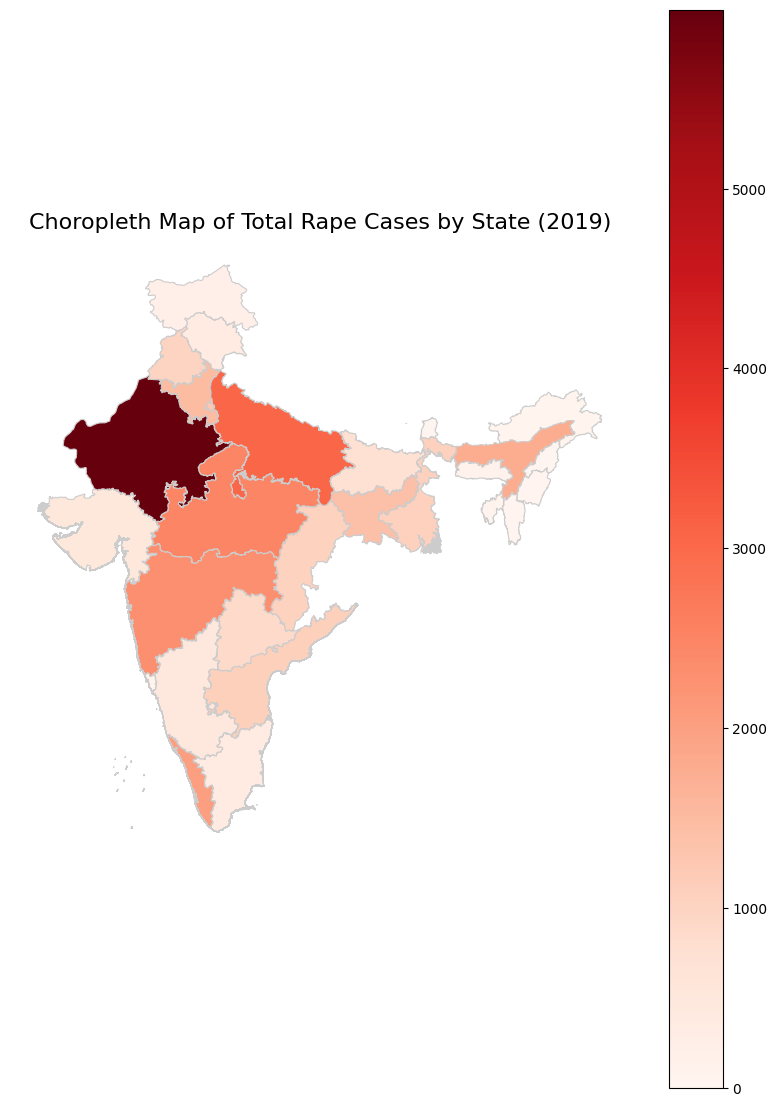

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


# Load India states shapefile (GeoJSON)
india_states_url = 'https://raw.githubusercontent.com/geohacker/india/master/state/india_telengana.geojson'
india_gdf = gpd.read_file(india_states_url)

# Rename column for merging
india_gdf = india_gdf.rename(columns={'NAME_1': 'State'})

# If there are known state name mismatches, map them
state_name_mapping = {
    'Orissa': 'Odisha',
    'Uttaranchal': 'Uttarakhand',
    # Add more mappings if needed
}
df_2019_processed['Mapped_State'] = df_2019_processed['State/UT'].replace(state_name_mapping)

# Merge your data with the geodataframe
merged_gdf = india_gdf.merge(
    df_2019_processed,
    left_on='State',
    right_on='Mapped_State',
    how='left'
)

# Plot choropleth
fig, ax = plt.subplots(1, 1, figsize=(10, 14))
merged_gdf.plot(
    column='No. of Victims (Total Rape Cases) - Total Victims',
    cmap='Reds',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True
)
ax.set_title('Choropleth Map of Total Rape Cases by State (2019)', fontsize=16)
ax.axis('off')
plt.show()


### Statewise intensity of Rape Cases in India in 2018

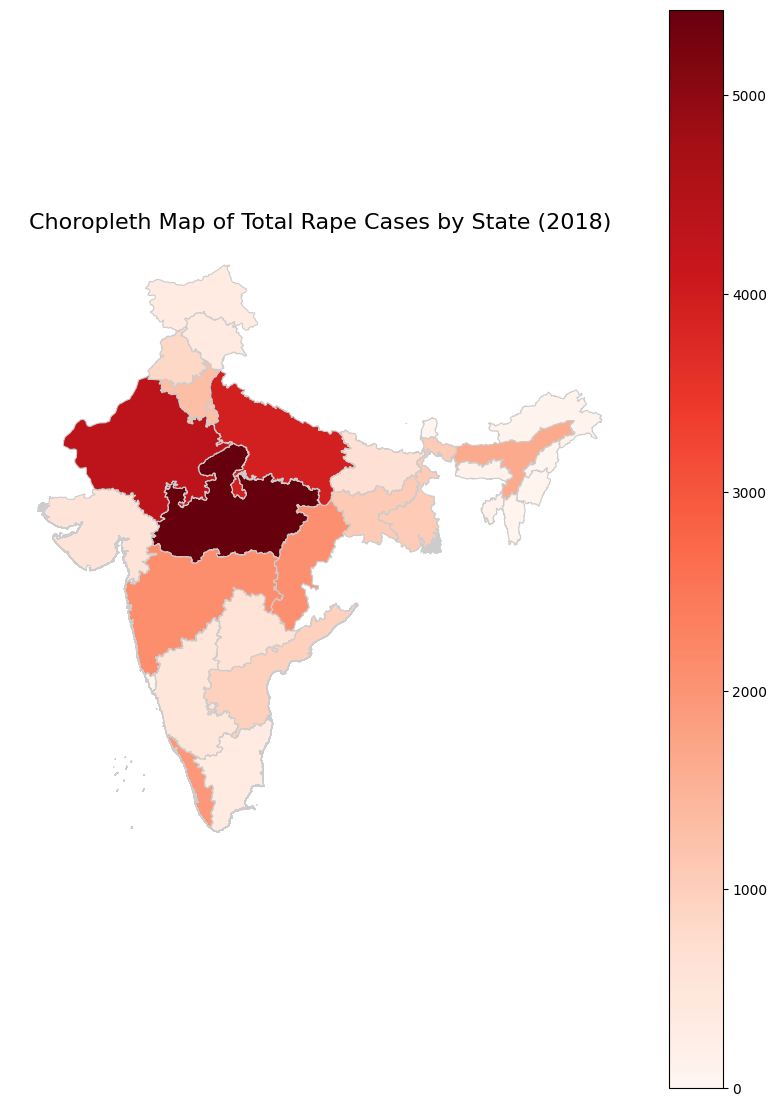

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load India states shapefile (GeoJSON)
india_states_url = 'https://raw.githubusercontent.com/geohacker/india/master/state/india_telengana.geojson'
india_gdf = gpd.read_file(india_states_url)

# Rename column for merging
india_gdf = india_gdf.rename(columns={'NAME_1': 'State'})

# If there are known state name mismatches, map them
state_name_mapping = {
    'Orissa': 'Odisha',
    'Uttaranchal': 'Uttarakhand',
    # Add more mappings if needed
}
df_2018_processed['Mapped_State'] = df_2018_processed['State/UT'].replace(state_name_mapping)

# Merge your data with the geodataframe
merged_gdf = india_gdf.merge(
    df_2018_processed,
    left_on='State',
    right_on='Mapped_State',
    how='left'
)

# Plot choropleth
fig, ax = plt.subplots(1, 1, figsize=(10, 14))
merged_gdf.plot(
    column='No. of Victims (Total Rape Cases) - Total Victims',
    cmap='Reds',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True
)
ax.set_title('Choropleth Map of Total Rape Cases by State (2018)', fontsize=16)
ax.axis('off')
plt.show()


### Statewise Intensity of Incest Rape Cases in India in 2015

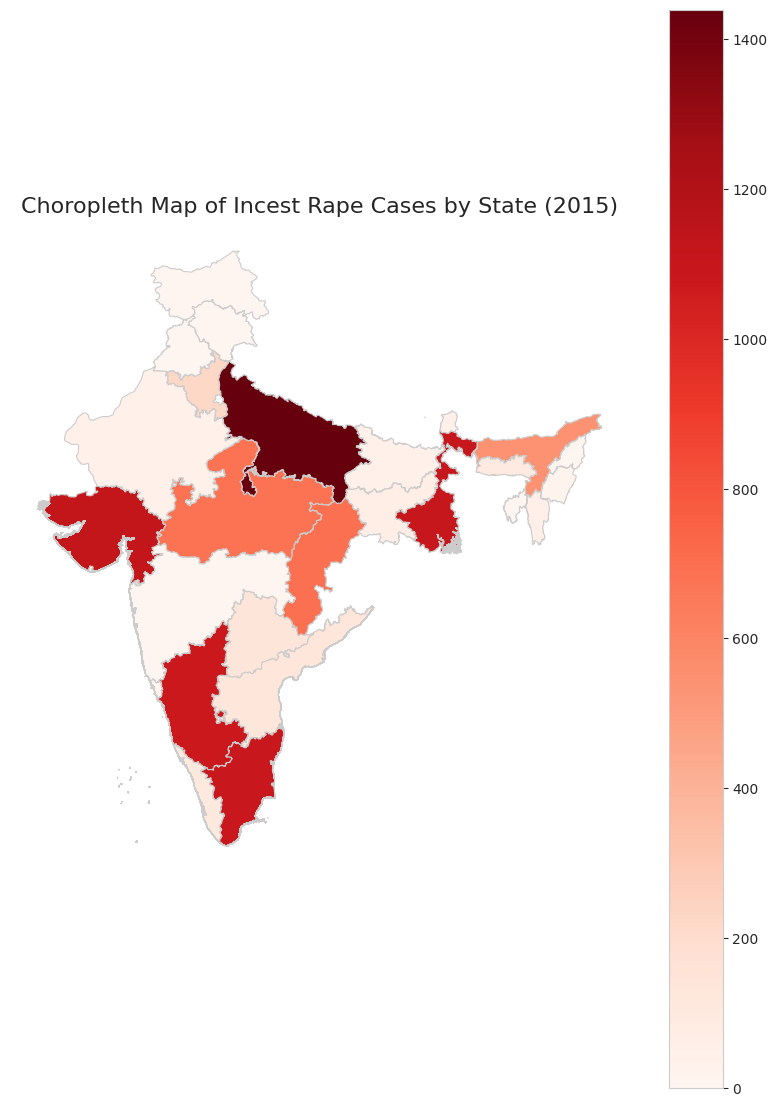

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Assume df_2015_processed is already loaded as per your code

# Load India states shapefile (GeoJSON)
india_states_url = 'https://raw.githubusercontent.com/geohacker/india/master/state/india_telengana.geojson'
india_gdf = gpd.read_file(india_states_url)

# Rename column for merging
india_gdf = india_gdf.rename(columns={'NAME_1': 'State'})

df_2015_processed['Mapped_State'] = df_2015_processed['States/UTs/Cities'].replace(state_name_mapping)

# Merge your data with the geodataframe
merged_gdf = india_gdf.merge(
    df_2015_processed,
    left_on='State',
    right_on='Mapped_State',
    how='left'
)

# Plot choropleth
fig, ax = plt.subplots(1, 1, figsize=(10, 14))
merged_gdf.plot(
    column='No. of Victims (Total Rape Cases) - Total Victims',
    cmap='Reds',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True
)
ax.set_title('Choropleth Map of Incest Rape Cases by State (2015)', fontsize=16)
ax.axis('off')
plt.show()


### Statewise intensity of Rape cases reported in India from 2001 to 2022

<ipython-input-50-c96616b869e1>:120: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])  # Make space for colorbar


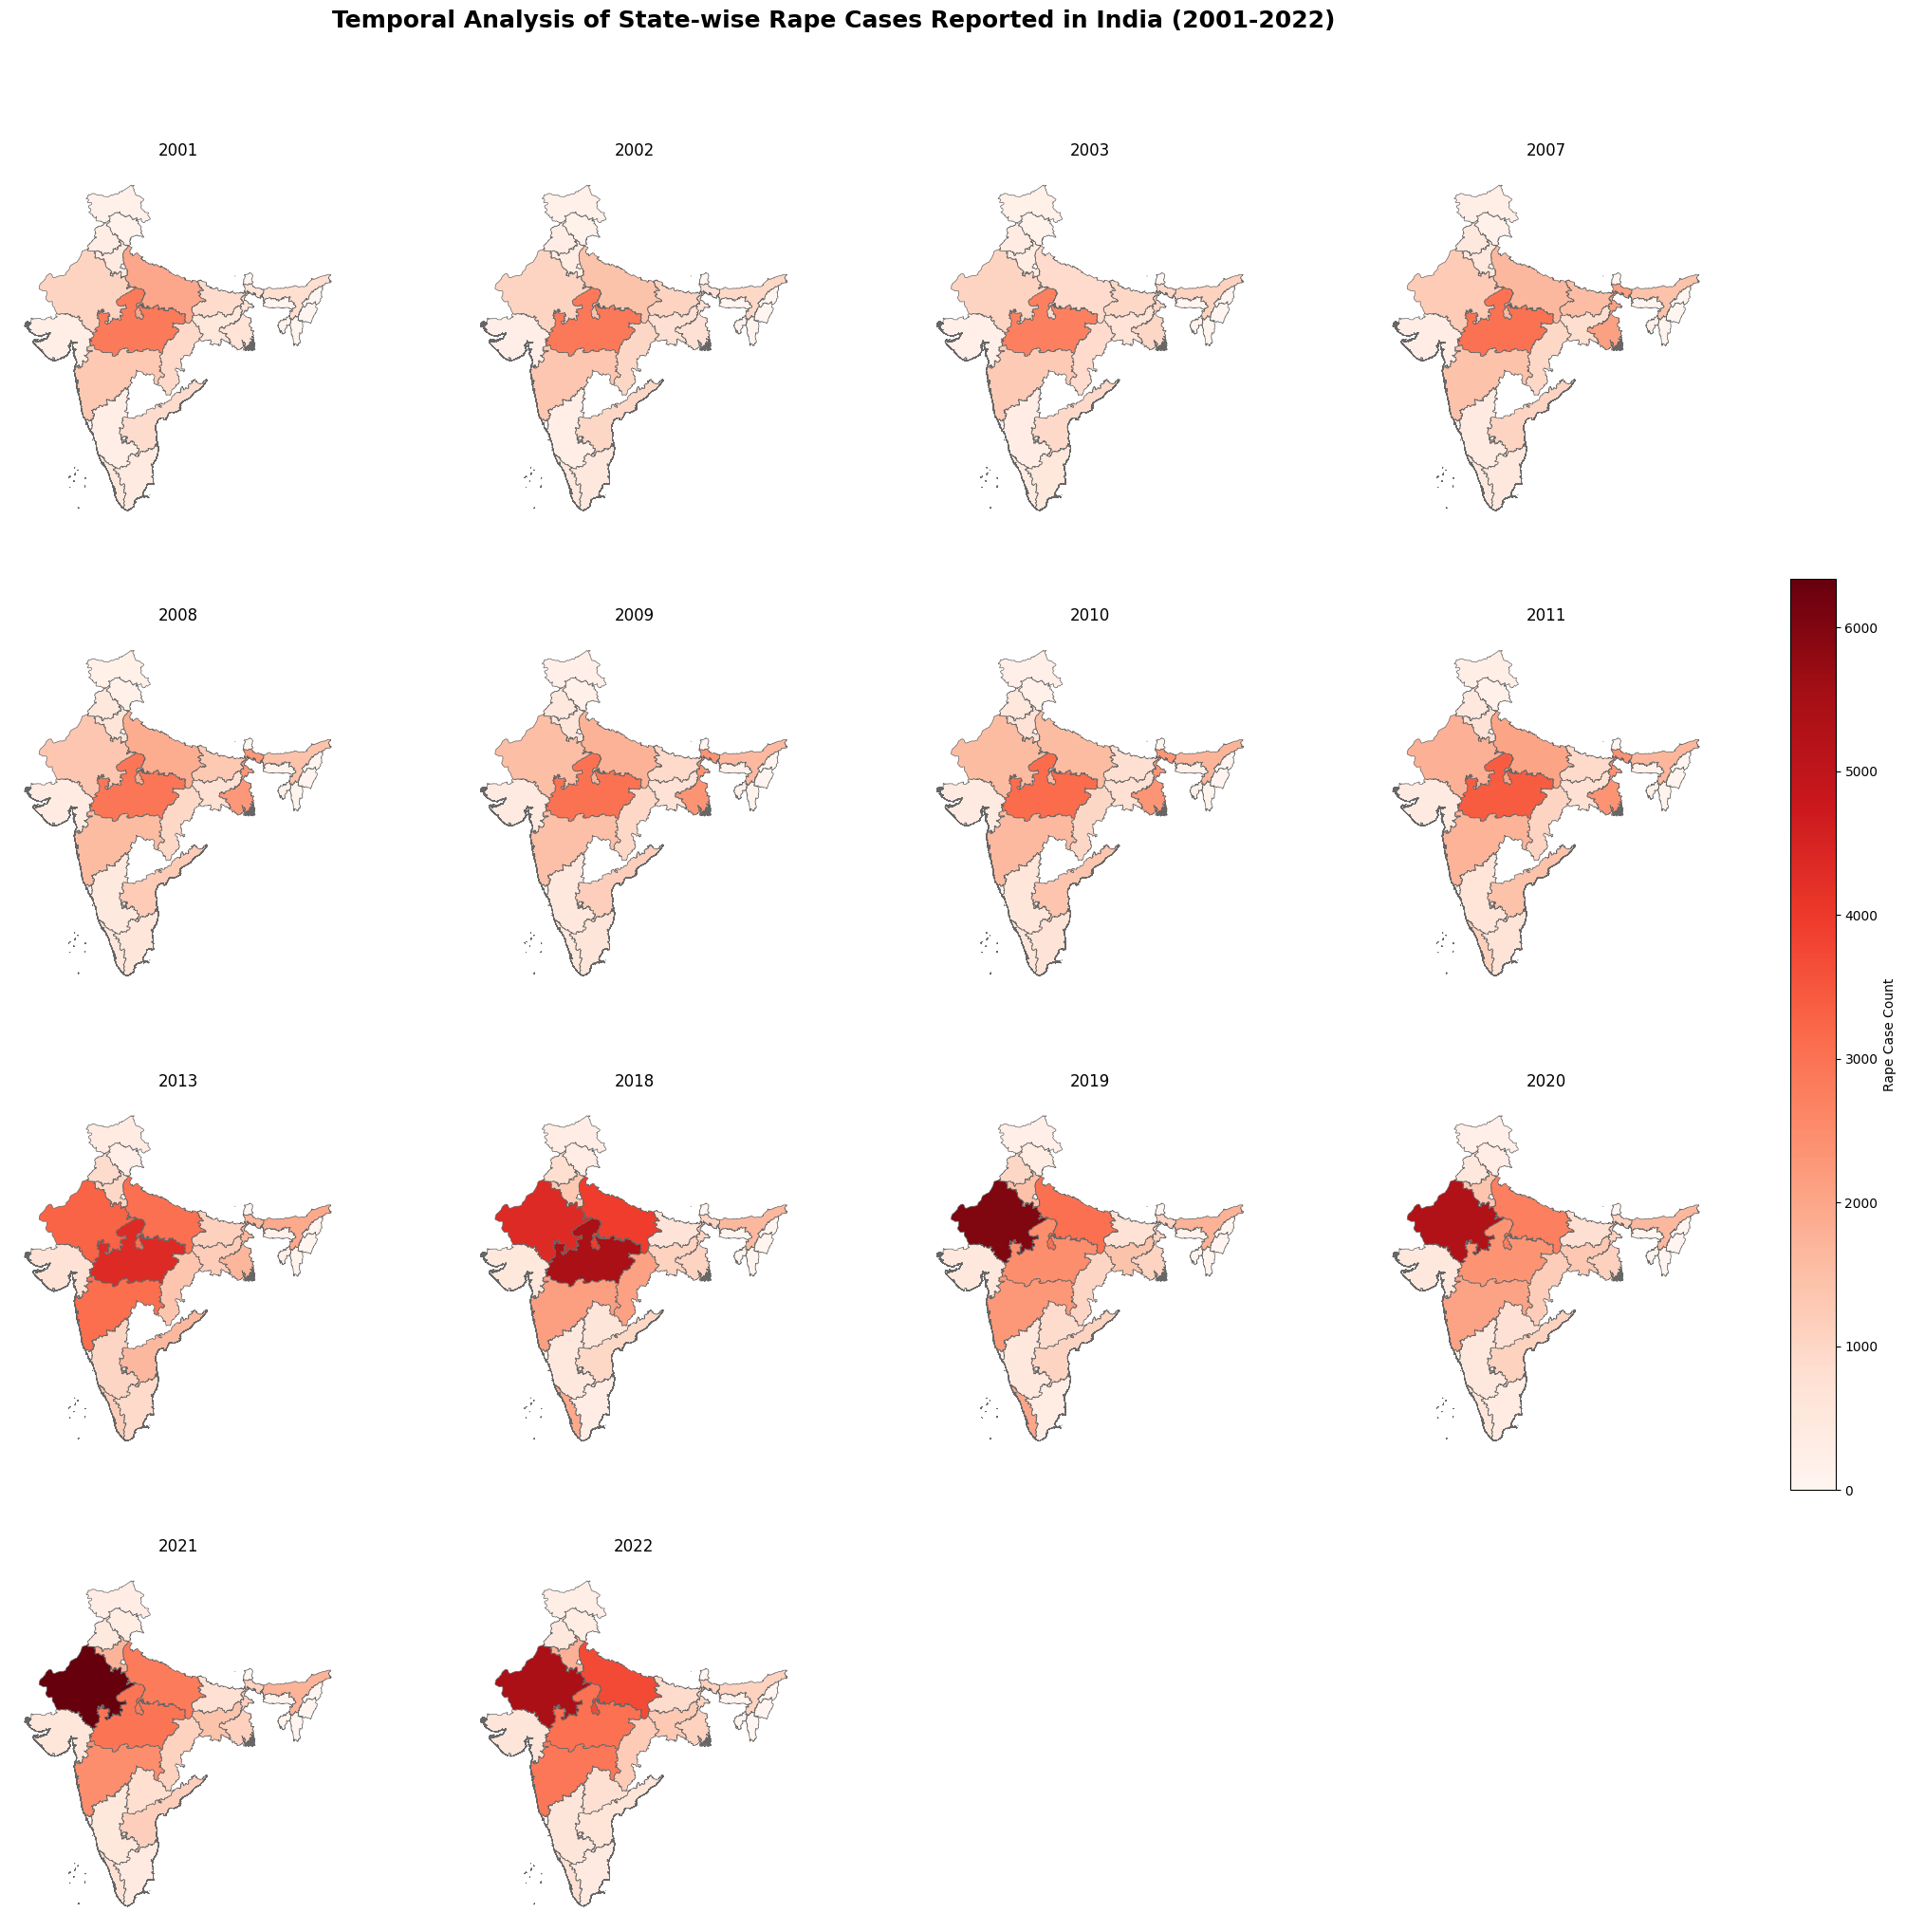

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import colors, gridspec
import numpy as np

# ========================
# 1. DATA LOADING & PREPROCESSING
# ========================
# Modified from original code + [6][7][12]

years = [2001,2002,2003,2007,2008,2009,2010,2011,2013,2018,2019,2020,2021,2022]
state_name_mapping = {  # Define state_name_mapping with more entries
    'Orissa': 'Odisha',
    'Uttaranchal': 'Uttarakhand',
    'Jammu & Kashmir': 'Jammu and Kashmir',
    'Arunachal Pradesh': 'Arunanchal Pradesh',
    'Delhi': 'NCT of Delhi',
    'Andaman & Nicobar Islands': 'Andaman and Nicobar Islands',
    'Dadra & Nagar Haveli': 'Dadra and Nagar Haveli',
    'Daman & Diu': 'Daman and Diu',
    # Add more mappings if needed
}

def load_multiple_years(years):
    """Batch load CSV files using glob pattern matching [6][12]"""
    all_dfs = []
    for year in years:
        try:
            df = pd.read_csv(f'/content/drive/MyDrive/Datasets/Processed/NCRB_{year}_Processed.csv')
            df['Mapped_State'] = df['States/UTs/Cities'].replace(state_name_mapping)
            df['Year'] = year
            all_dfs.append(df)
        except FileNotFoundError:
            print(f"Data not found for {year}, skipping")
        except KeyError as e:
            print(f"Column '{e}' not found in data for year {year}, skipping")

    return pd.concat(all_dfs, ignore_index=True)

# Load geographical data [5]
geojson_url = 'https://raw.githubusercontent.com/geohacker/india/master/state/india_telengana.geojson'
india_gdf = gpd.read_file(geojson_url).rename(columns={'NAME_1': 'State'})

# Merge all years [7]
full_df = load_multiple_years(years)
combined_gdf = india_gdf.merge(
    full_df,
    left_on='State',
    right_on='Mapped_State',
    how='left'
)

# ========================
# 2. VISUALIZATION SETUP
# ========================
# Using gridspec for dynamic layouts [4][8]
n_years = len(years)
ncols = 4
nrows = int(np.ceil(n_years / ncols))

fig = plt.figure(figsize=(24, 6*nrows))
gs = gridspec.GridSpec(nrows, ncols, figure=fig,
                      hspace=0.3, wspace=0.15,
                      width_ratios=[1]*ncols)

# Unified color normalization [5]
# Handle potential NaN values when calculating vmin and vmax
vmin = combined_gdf['No. of Victims (Total Rape Cases) - Total Victims'].dropna().min()
vmax = combined_gdf['No. of Victims (Total Rape Cases) - Total Victims'].dropna().max()
norm = colors.Normalize(vmin=vmin, vmax=vmax)

# ========================
# 3. TEMPORAL CHOROPLETH GRID
# ========================
# Dynamic subplot creation with shared axes [4][9]
axs = []
for idx, year in enumerate(years):
    row = idx // ncols
    col = idx % ncols

    ax = fig.add_subplot(gs[row, col])
    axs.append(ax)

    year_data = combined_gdf[combined_gdf['Year'] == year]

    # Check if year_data is empty and skip plotting if so
    if year_data.empty:
        print(f"Skipping plot for year {year} due to empty data")
        continue

    # Plotting logic [3][5]
    year_data.plot(
        column='No. of Victims (Total Rape Cases) - Total Victims',
        cmap='Reds',
        norm=norm,
        linewidth=0.5,
        ax=ax,
        edgecolor='0.4',
        legend=False
    )

    # Annotation
    ax.set_title(f'{year}', fontsize=12, pad=10)
    ax.axis('off')

# ========================
# 4. UNIFIED LEGEND SYSTEM
# ========================
# Shared colorbar [5][9]
cax = fig.add_axes([0.92, 0.3, 0.02, 0.4])
sm = plt.cm.ScalarMappable(norm=norm, cmap='Reds')
fig.colorbar(sm, cax=cax, label='Rape Case Count')

# ========================
# 5. FIGURE ENHANCEMENTS
# ========================
plt.suptitle('Temporal Analysis of State-wise Rape Cases Reported in India (2001-2022)',
             y=0.95, fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0, 0.9, 0.95])  # Make space for colorbar
plt.show()

## Age-wise Distribution

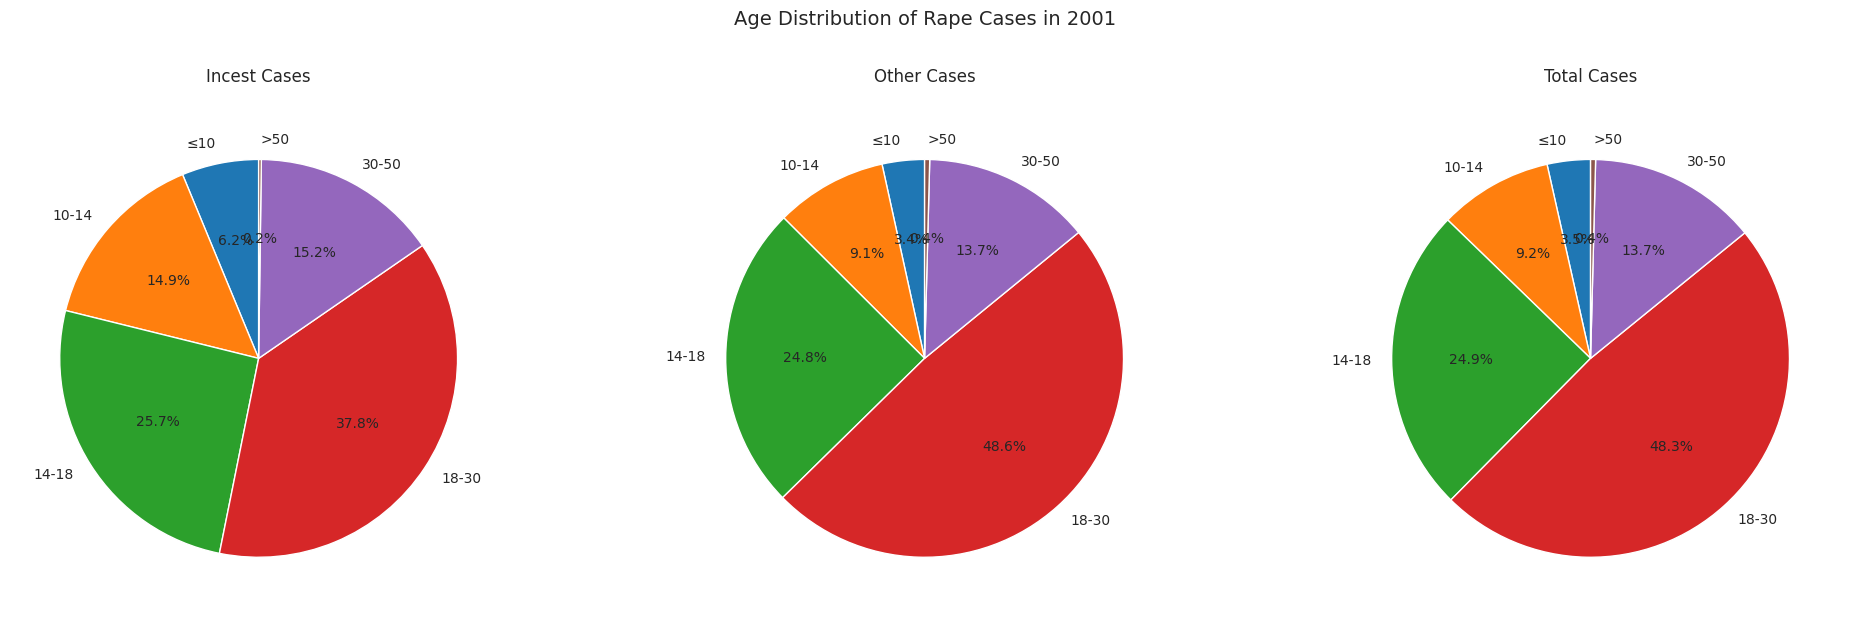

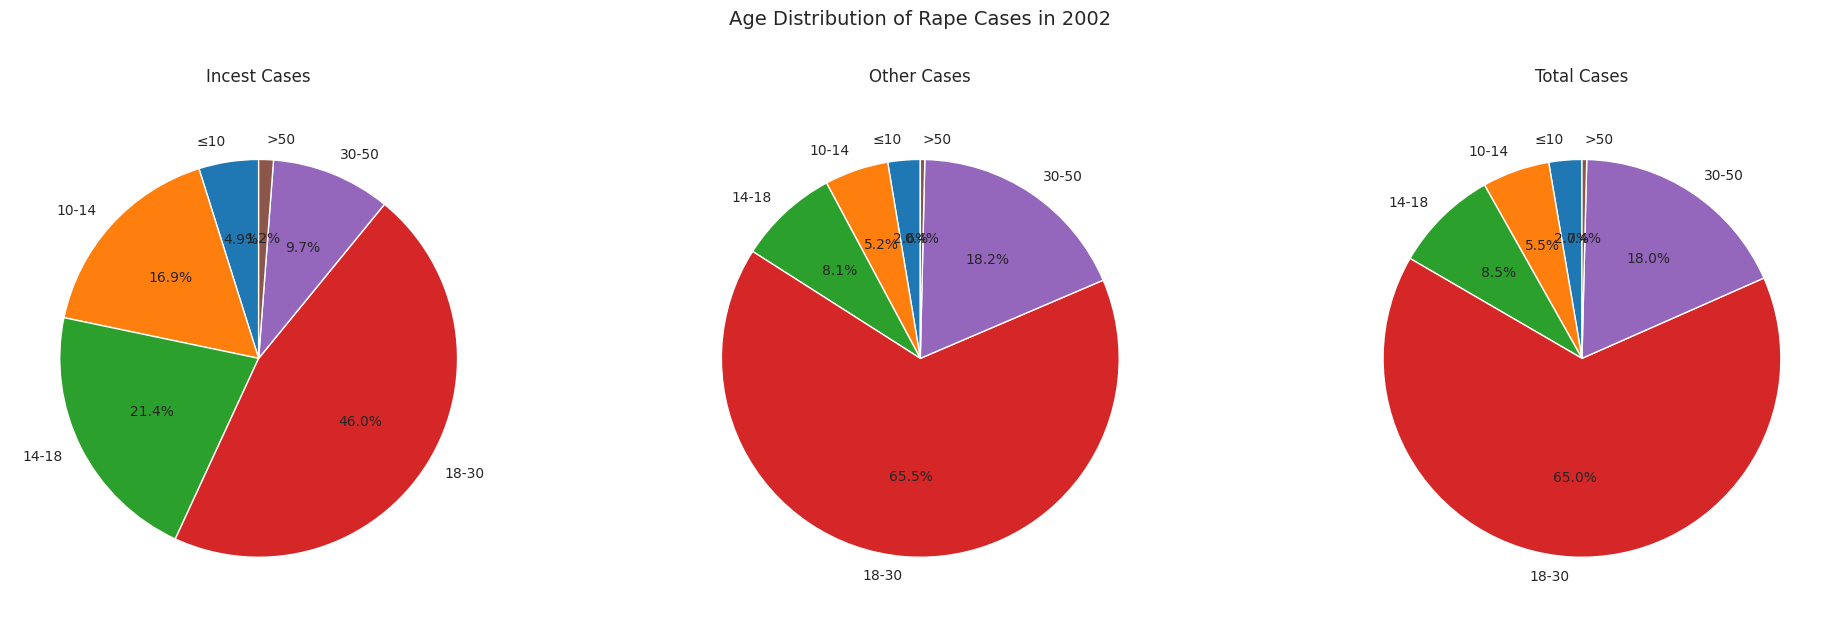

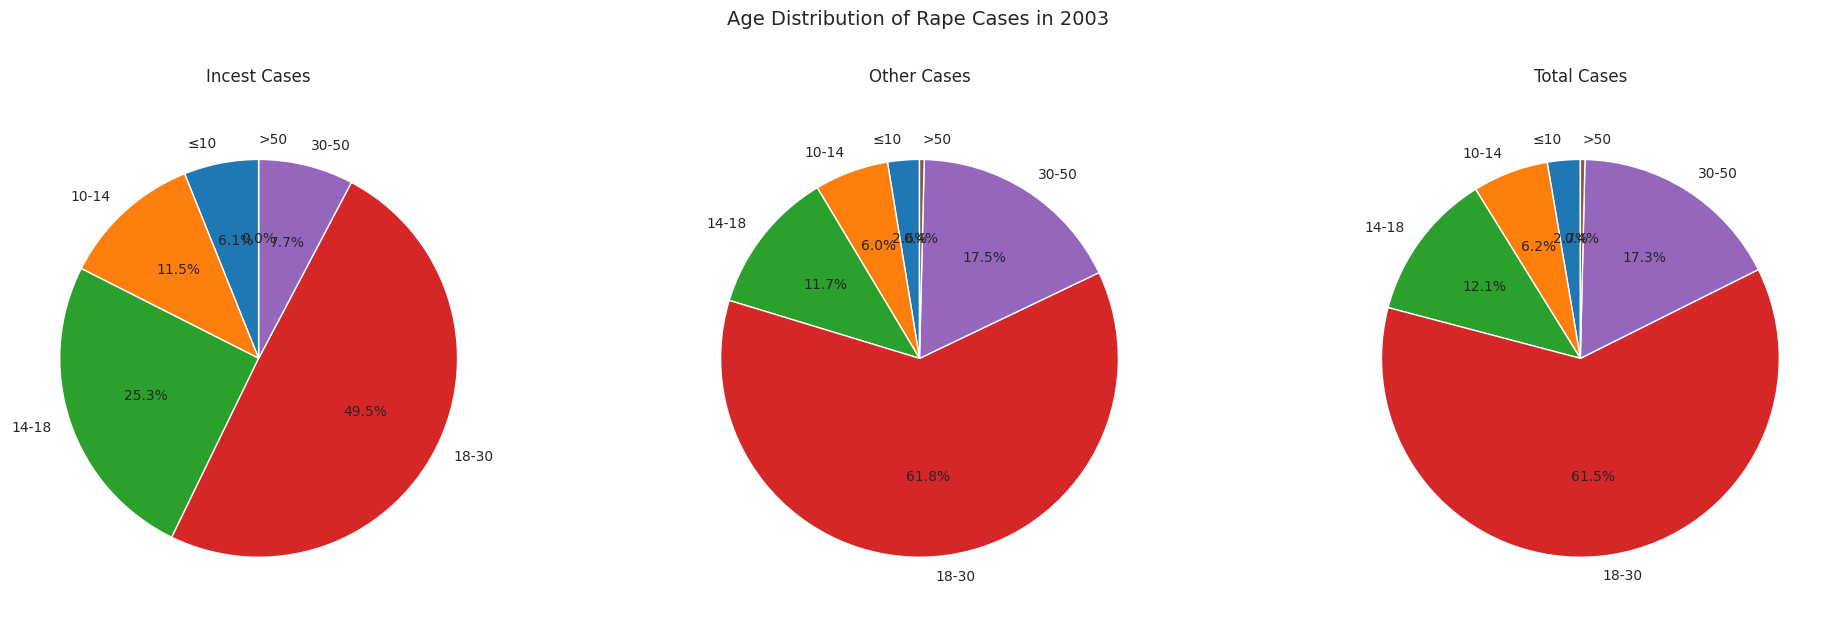

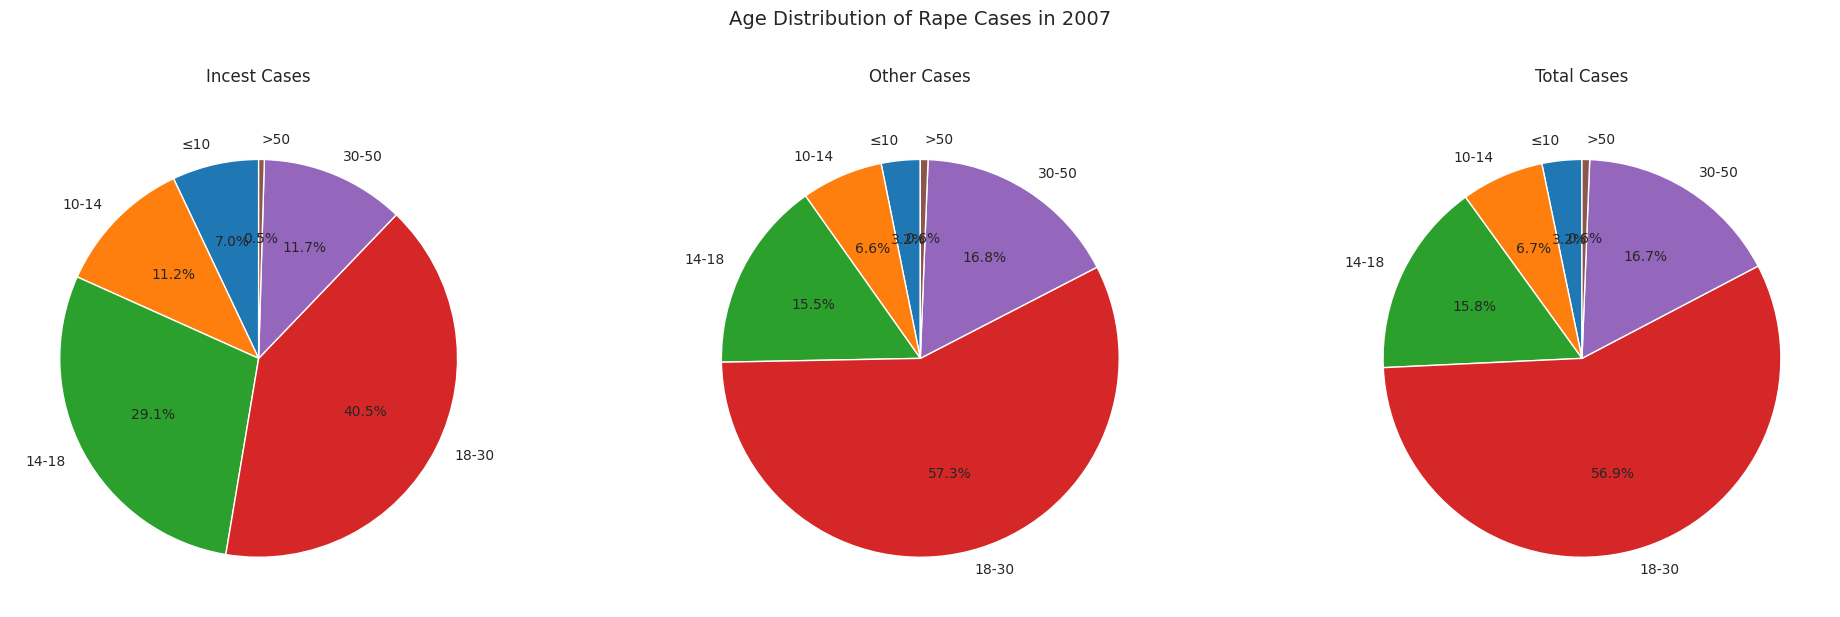

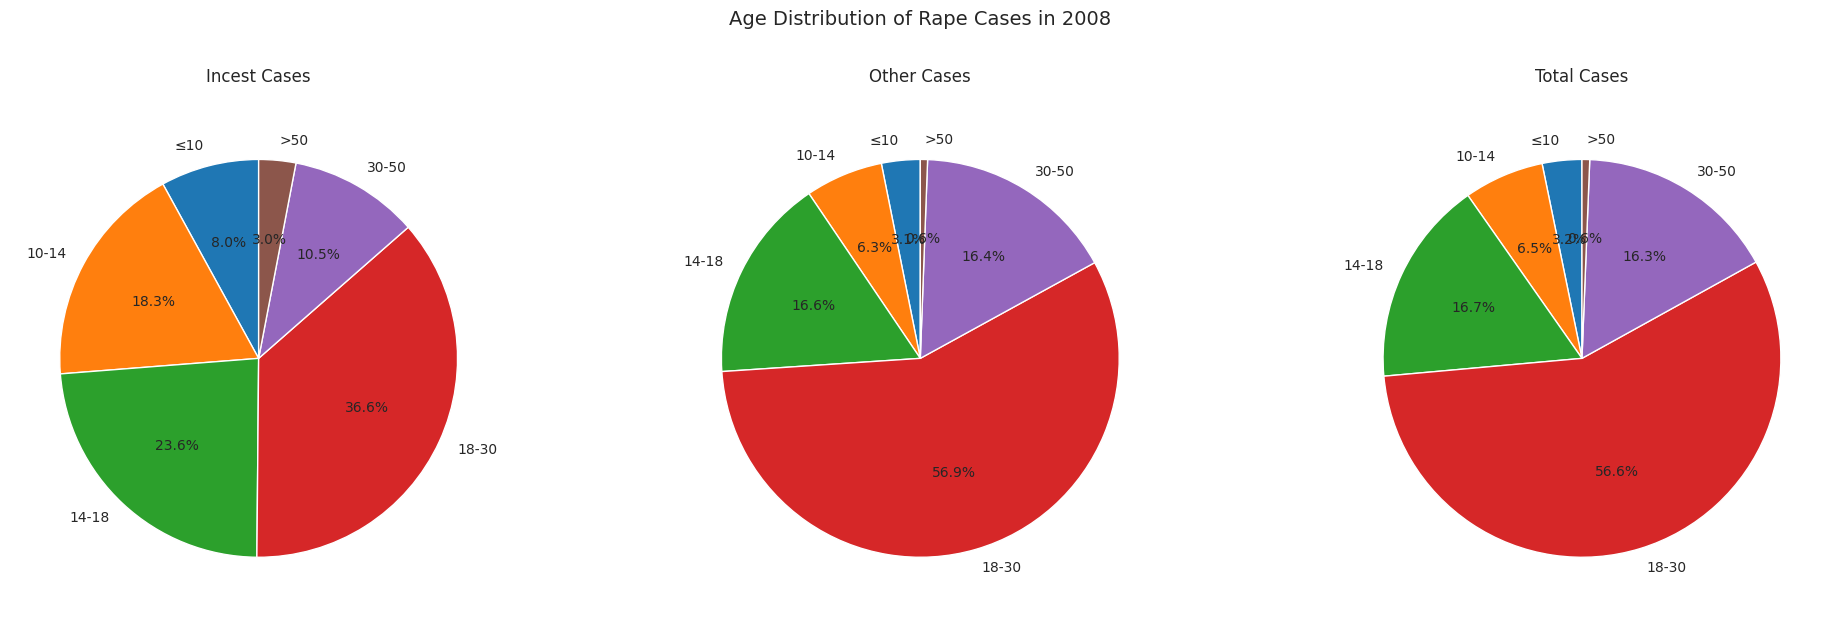

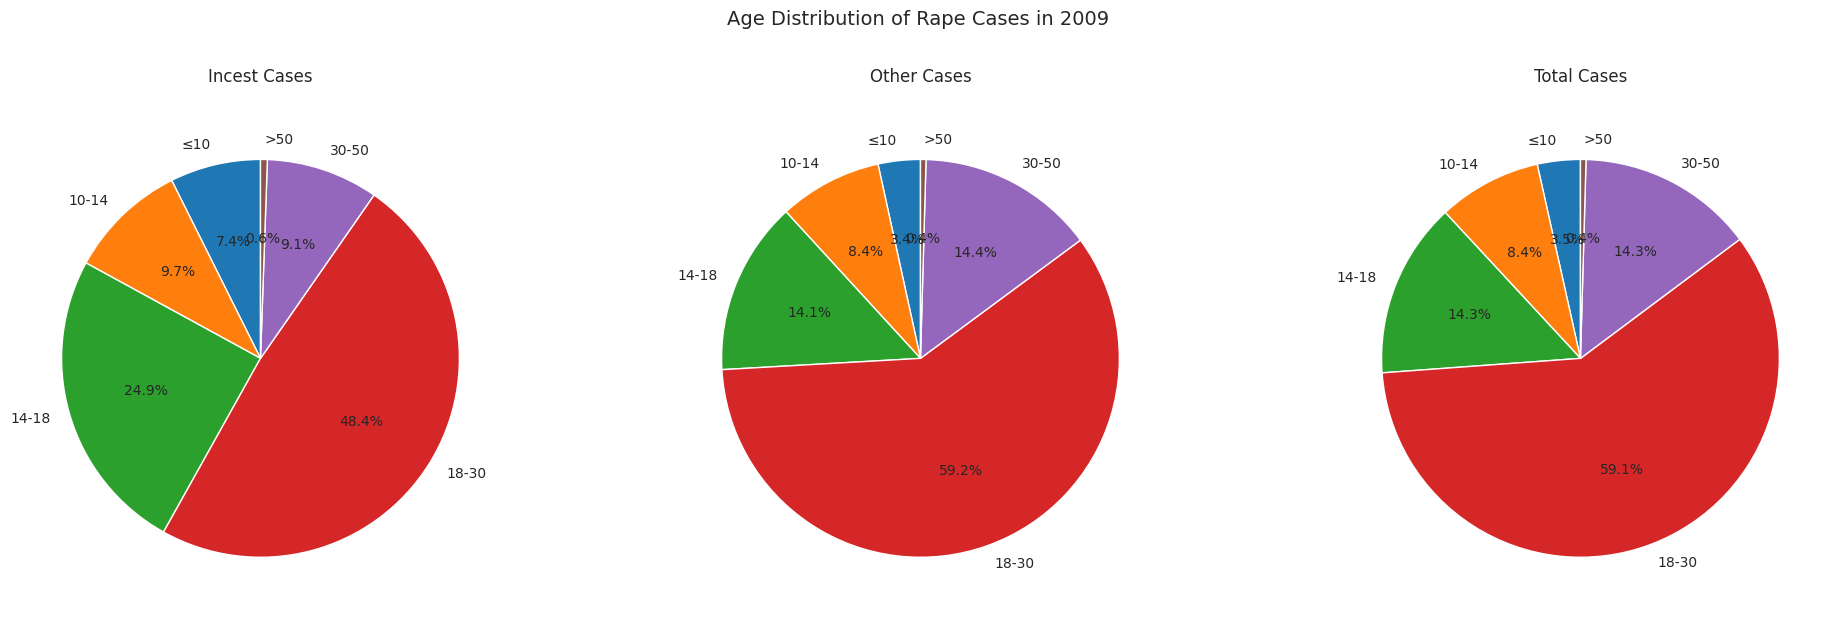

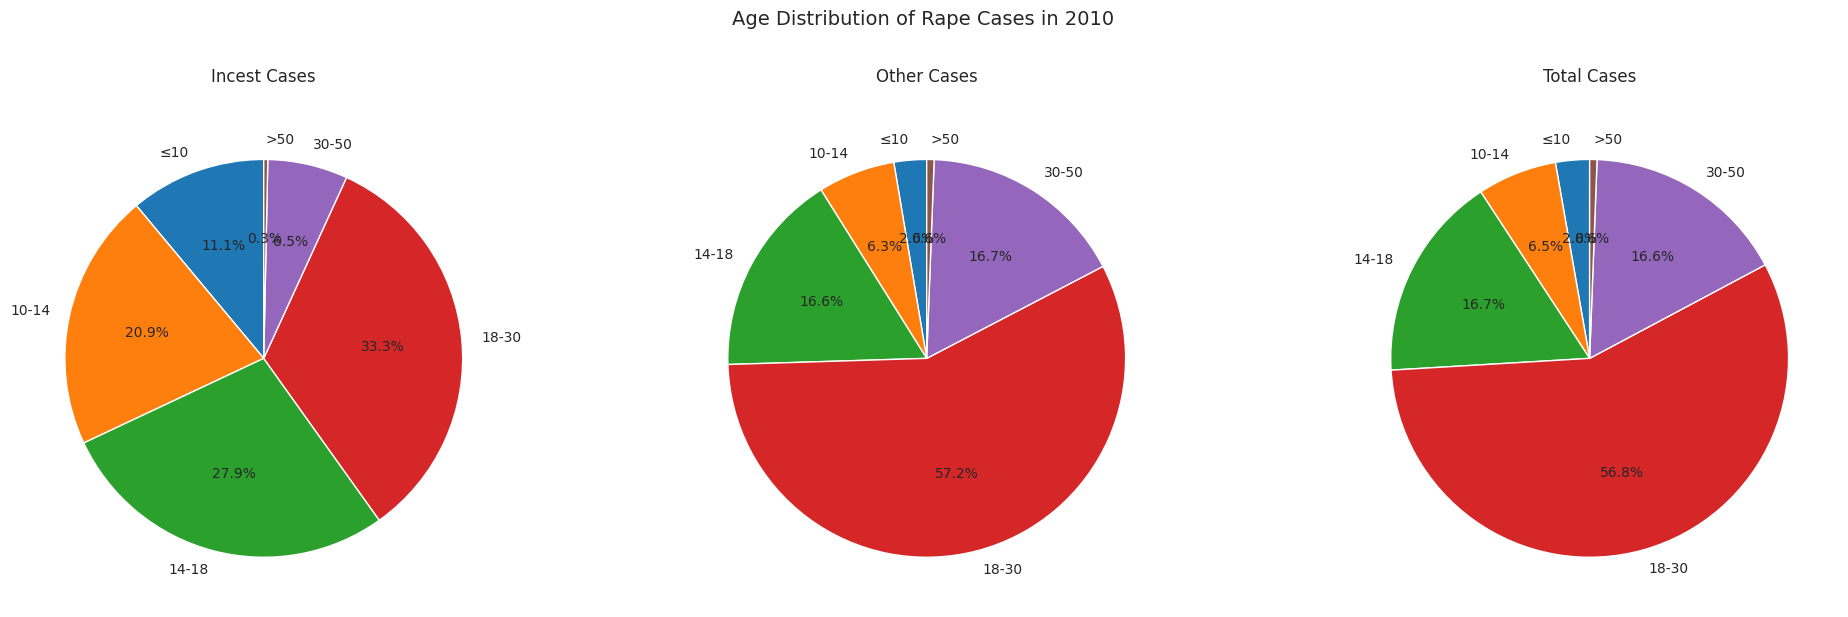

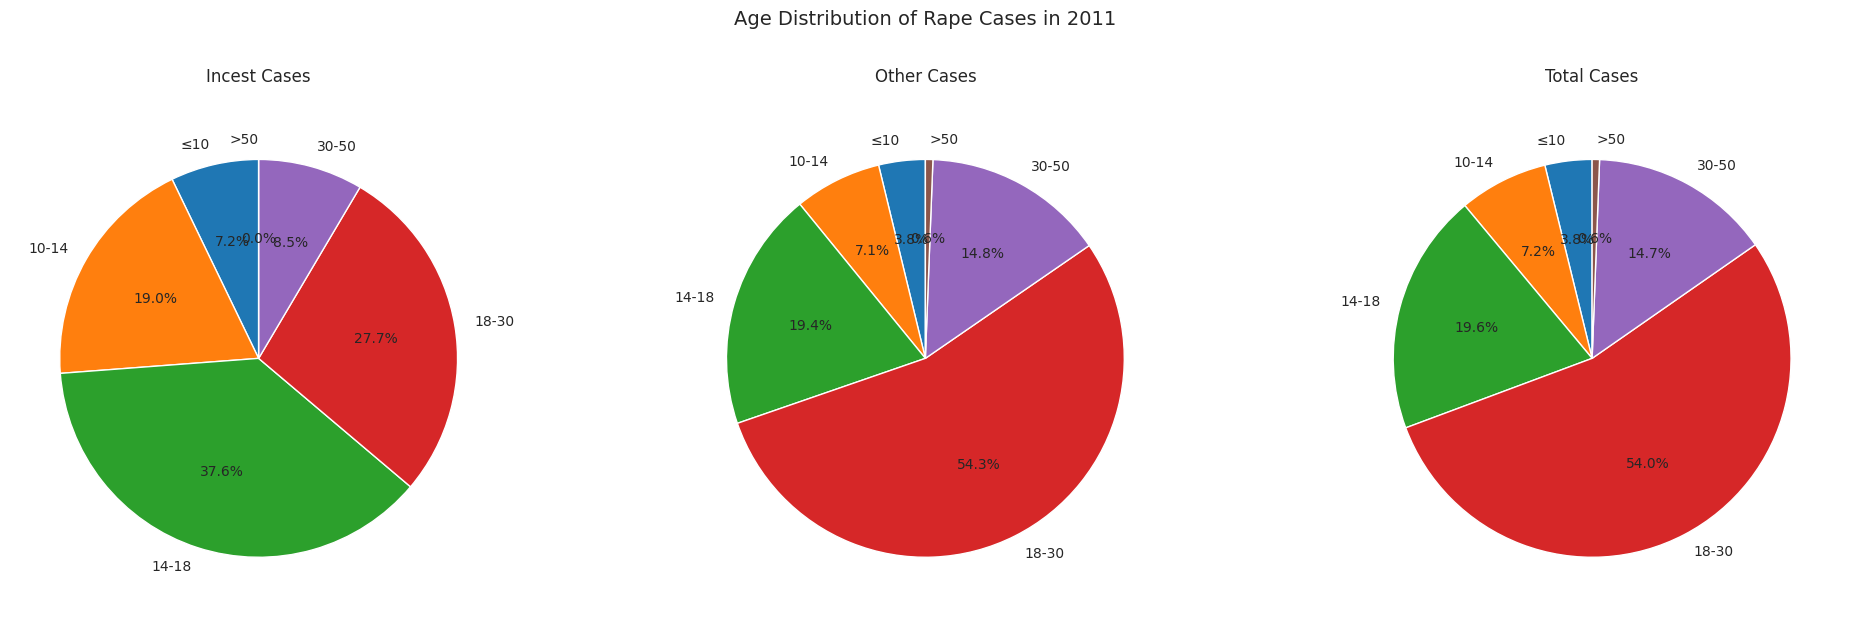

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets (ensure correct file paths)
df_2001 = pd.read_csv('/content/drive/MyDrive/Datasets/NCRB_2001_Table_5.3.csv')
df_2002 = pd.read_csv('/content/drive/MyDrive/Datasets/NCRB_2002_Table_5.3.csv')
df_2003 = pd.read_csv('/content/drive/MyDrive/Datasets/NCRB_2003_Table_5.3.csv')
df_2004 = pd.read_csv('/content/drive/MyDrive/Datasets/NCRB_2004_Table_5.3.csv')
df_2006 = pd.read_csv('/content/drive/MyDrive/Datasets/NCRB_2006_Table_5.3.csv')
df_2007 = pd.read_csv('/content/drive/MyDrive/Datasets/NCRB_2007_Table_5.3.csv')
df_2008 = pd.read_csv('/content/drive/MyDrive/Datasets/NCRB_2008_Table_5.3.csv')
df_2009 = pd.read_csv('/content/drive/MyDrive/Datasets/NCRB_2009_Table_5.3.csv')
df_2010 = pd.read_csv('/content/drive/MyDrive/Datasets/NCRB_2010_Table_5.3.csv')
df_2011 = pd.read_csv('/content/drive/MyDrive/Datasets/NCRB_2011_Table_5.3.csv')

# List of years and corresponding DataFrames (excluding 2005)
years = [2001, 2002, 2003, 2007, 2008, 2009, 2010, 2011]
dfs = [df_2001, df_2002, df_2003,
       df_2007, df_2008, df_2009, df_2010, df_2011]

# Define age group labels
age_labels = ['≤10', '10-14', '14-18', '18-30', '30-50', '>50']

# Define columns for each category (note hyphen inconsistencies in total's 10-14 column)
incest_cols = [
    'No. of Victims (Incest Rape Cases) upto 10 Years',
    'No. of Victims (Incest Rape Cases) - 10 - 14 Years',
    'No. of Victims (Incest Rape Cases) - 14 - 18 Years',
    'No. of Victims (Incest Rape Cases) - 18 - 30 Years',
    'No. of Victims (Incest Rape Cases) - 30 - 50 Years',
    'No. of Victims (Incest Rape Cases) above 50 Years'
]

other_cols = [
    'No. of Victims (Other Rape Cases) upto 10 Years',
    'No. of Victims (Other Rape Cases) - 10 - 14 Years',
    'No. of Victims (Other Rape Cases) - 14 - 18 Years',
    'No. of Victims (Other Rape Cases) - 18 - 30 Years',
    'No. of Victims (Other Rape Cases) - 30 - 50 Years',
    'No. of Victims (Other Rape Cases) above 50 Years'
]

total_cols = [
    'No. of Victims (Total Rape Cases) upto 10 Years',
    'No. of Victims (Total Rape Cases) - 10-14 Years',  # Hyphen without spaces
    'No. of Victims (Total Rape Cases) - 14 - 18 Years',
    'No. of Victims (Total Rape Cases) - 18 - 30 Years',
    'No. of Victims (Total Rape Cases) - 30 - 50 Years',
    'No. of Victims (Total Rape Cases) above 50 Years'
]

# Generate pie charts for each year
for year, df in zip(years, dfs):
    # Exclude aggregated 'Total' rows
    df_filtered = df[df['States/UTs/Cities'] != 'Total']

    # Calculate sums for each age group
    incest_data = df_filtered[incest_cols].sum()
    other_data = df_filtered[other_cols].sum()
    total_data = df_filtered[total_cols].sum()

    # Create subplots
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    fig.suptitle(f'Age Distribution of Rape Cases in {year}', fontsize=14, y=1.02)

    # Incest cases pie chart
    axes[0].pie(incest_data, labels=age_labels, autopct='%1.1f%%', startangle=90)
    axes[0].set_title('Incest Cases', pad=20)

    # Other cases pie chart
    axes[1].pie(other_data, labels=age_labels, autopct='%1.1f%%', startangle=90)
    axes[1].set_title('Other Cases', pad=20)

    # Total cases pie chart
    axes[2].pie(total_data, labels=age_labels, autopct='%1.1f%%', startangle=90)
    axes[2].set_title('Total Cases', pad=20)

    plt.tight_layout()
    plt.show()


## Conclusion and Key Insights

### Percentage Changes in total rape cases over year

In [ ]:
import pandas as pd
import numpy as np

# Define the years from the datasets
years = [2001, 2002, 2003,  2007, 2008, 2009, 2010, 2011, 2013, 2015, 2018, 2019, 2020, 2021, 2022]

# List to store dataframes
dfs = [df_2001_processed, df_2002_processed, df_2003_processed,  df_2007_processed, df_2008_processed, df_2009_processed,
       df_2010_processed, df_2011_processed, df_2013_processed, df_2015_processed,
       df_2018_processed, df_2019_processed, df_2020_processed, df_2021_processed,
       df_2022_processed]

# Create a list to store the data
data = []

# Calculate total victims for each year
for year, df in zip(years, dfs):
    total_victims = df['No. of Victims (Total Rape Cases) - Total Victims'].sum()
    data.append({'Year': year, 'Total Victims': total_victims})

# Create a DataFrame from the collected data
result_df = pd.DataFrame(data)
result_df = result_df.sort_values('Year').reset_index(drop=True)


# Calculate year-over-year percentage change
result_df['% Change YoY'] = result_df['Total Victims'].pct_change() * 100

# Calculate percentage change from baseline year (2001)
base_year_victims = result_df.iloc[0]['Total Victims']
result_df['% Change from 2001'] = ((result_df['Total Victims'] - base_year_victims) / base_year_victims) * 100

# Format the percentage columns
result_df['% Change YoY'] = result_df['% Change YoY'].apply(
    lambda x: f"+{x:.2f}%" if x > 0 else f"{x:.2f}%" if not pd.isna(x) else "N/A"
)
result_df['% Change from 2001'] = result_df['% Change from 2001'].apply(
    lambda x: f"+{x:.2f}%" if x > 0 else f"{x:.2f}%" if not pd.isna(x) else "N/A"
)

# Display the results
print(result_df)


    Year  Total Victims % Change YoY % Change from 2001
0   2001        50760.0          N/A              0.00%
1   2002        51764.0       +1.98%             +1.98%
2   2003        50240.0       -2.94%             -1.02%
3   2007        65885.0      +31.14%            +29.80%
4   2008        68021.0       +3.24%            +34.01%
5   2009        67647.0       -0.55%            +33.27%
6   2010        70201.0       +3.78%            +38.30%
7   2011        78018.0      +11.14%            +53.70%
8   2013       101292.0      +29.83%            +99.55%
9   2015        26499.0      -73.84%            -47.80%
10  2018       100068.0     +277.63%            +97.14%
11  2019        96096.0       -3.97%            +89.31%
12  2020        84138.0      -12.44%            +65.76%
13  2021        95031.0      +12.95%            +87.22%
14  2022        94548.0       -0.51%            +86.26%


In [ ]:
# Conclusion and Key Insights

print("Conclusion:")
print(" ---------------")
print('''This analysis of NCRB data reveals a complex picture of rape cases in India from 2001 to 2022.
        Trends in total, incest, and other rape cases, categorized by age group, highlight the need for further investigation into contributing societal factors.
        Geographic variations in reported cases emphasize the importance of localized interventions.
        The data quality and consistency across years, along with missing data for some years, represent a limitation in the analysis.
''')

print("\nKey Insights:")
print(" ---------------")
print('''- **Temporal Trends:**  While overall trends show fluctuations,  consistent patterns emerge in the age distribution of victims.
The age group below 18 shows significant numbers across various categories, indicating a persistent vulnerability within this demographic.''')
print('   ')
print("- **Geographic Distribution:** there are 4 states over these years which have been reported most of the case i.e. Rajsthan, Madhya Pradesh, Uttar Pradesh and Maharashta")
print('   ')
print('''- **Data Quality Considerations:**
Inconsistent column names and missing data across different years limit the scope of analysis and the reliability of long-term trends.
Further data cleaning and standardization are crucial to extract more robust conclusions. Future analysis could benefit from incorporating demographic and socioeconomic factors to provide richer insights.''')
print('   ')
print('''- **Incest vs. Other Rape Cases:**
The analysis of the ratio and normalized percentages of incestuous versus other rape cases could reveal important insights.
A rising or falling trend in these metrics might imply changes in societal norms or reporting patterns.
It's crucial to examine the specific context of each state.''')
print('   ')
print('''- **Age-wise distribution**
1. Across the years, the age group below 18 shows consistent high percentage in the category of incest, other and total rape cases.
2. Across the year,  Incest Rape cases of minors are around 50% of the total incest cases.
3. More than 50% of the total Rape case are form age category of 18-30 year old.
3. More focused and tailored interventions are required within this demographic.''')


Conclusion:
 ---------------
This analysis of NCRB data reveals a complex picture of rape cases in India from 2001 to 2022.  
        Trends in total, incest, and other rape cases, categorized by age group, highlight the need for further investigation into contributing societal factors.
        Geographic variations in reported cases emphasize the importance of localized interventions. 
        The data quality and consistency across years, along with missing data for some years, represent a limitation in the analysis.


Key Insights:
 ---------------
- **Temporal Trends:**  While overall trends show fluctuations,  consistent patterns emerge in the age distribution of victims.  
The age group below 18 shows significant numbers across various categories, indicating a persistent vulnerability within this demographic.
   
- **Geographic Distribution:** there are 4 states over these years which have been reported most of the case i.e. Rajsthan, Madhya Pradesh, Uttar Pradesh and Maharashta
